# 미국 장단기 금리차와 KOSPI 지수, 금값 추이 비교

> References : https://dotsnlines.tistory.com/971

- 장단기 금리가 역전되면 항상 경기침체가 나타났다.

![스크린샷 2024-07-17 오후 3 38 51](https://github.com/user-attachments/assets/32c40670-4133-424a-927f-46de783b4509)

- 중간선 0 아래는 장단기 금리 역전 구간이며 회색 부분은 경기침체 구간이다.

- 최근 금리역전은 2022년 6월이다.

-> 미국 장단기 국채금리 역전과 KOSPI 지수, 금값은 어떤 관계가 있는가?

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
start_date = "2000-07-01" # 00년 7월 ~ 현재 7월(24년) : 약 25년 추이 파악

kospi = yf.download("^KS11", start_date)
irx = yf.download("^IRX", start_date)
tnx = yf.download("^TNX", start_date)
gold = yf.download("GC=F", start_date)
# ^KS11 : KOSPI ^IRX : 미국 3개월물 국채금리 ^TNX : 미국 10년물 국채금리 GC=F : 금값

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
print(kospi.head(5))

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-07-03  824.830017  836.530029  824.830017  835.210022  835.210022  440800
2000-07-04  840.200012  841.520020  818.469971  818.530029  818.530029  439100
2000-07-05  818.400024  830.400024  810.099976  830.400024  830.400024  531900
2000-07-06  822.760010  840.909973  818.239990  837.630005  837.630005  696000
2000-07-07  841.500000  851.619995  837.840027  841.739990  841.739990  569800


In [17]:
print(irx.head(5))

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2000-07-03  5.71  5.87  5.71   5.87       5.87       0
2000-07-05  5.80  5.82  5.79   5.81       5.81       0
2000-07-06  5.81  5.85  5.81   5.84       5.84       0
2000-07-07  5.84  5.85  5.82   5.85       5.85       0
2000-07-10  5.86  5.88  5.86   5.88       5.88       0


In [18]:
print(tnx.head(5))

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2000-07-03  6.035  6.057  5.972  5.980      5.980       0
2000-07-05  5.951  5.976  5.925  5.976      5.976       0
2000-07-06  6.001  6.035  6.001  6.031      6.031       0
2000-07-07  6.035  6.035  5.959  5.997      5.997       0
2000-07-10  6.022  6.043  6.022  6.026      6.026       0


In [19]:
print(gold.head(5)) # 금 현물 : 2000년 8월 30일 데이터부터 살아있음

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-08-30  273.899994  273.899994  273.899994  273.899994  273.899994       0
2000-08-31  274.799988  278.299988  274.799988  278.299988  278.299988       0
2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000       0
2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988       2
2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012       0


In [20]:
df = pd.DataFrame({"KOSPI" : kospi["Adj Close"], "3MT" : irx["Adj Close"], "10YT" : tnx["Adj Close"], "GOLD" : gold["Adj Close"]})

In [21]:
df["10YT - 3MT"] = df["10YT"] - df["3MT"] # 미국 장단기 금리차(10년물 - 3개월물)

In [22]:
df = df[["KOSPI", "GOLD", "10YT - 3MT"]]

In [23]:
df.head(5)

,KOSPI,GOLD,10YT - 3MT
Date,,,
2000-07-03,835.210022,NaN,0.110
2000-07-04,818.530029,NaN,NaN
2000-07-05,830.400024,NaN,0.166
2000-07-06,837.630005,NaN,0.191
2000-07-07,841.739990,NaN,0.147


In [24]:
df.dropna(inplace = True) # 결측치 제거(금 현물은 2000년 9월 경부터 살아있음)

In [25]:
df.head(5)

,KOSPI,GOLD,10YT - 3MT
Date,,,
2000-08-30,718.929993,273.899994,-0.320
2000-08-31,688.619995,278.299988,-0.381
2000-09-01,692.190002,277.000000,-0.405
2000-09-05,679.239990,275.799988,-0.377
2000-09-06,676.690002,274.200012,-0.298


<Figure size 10000x1000 with 0 Axes>

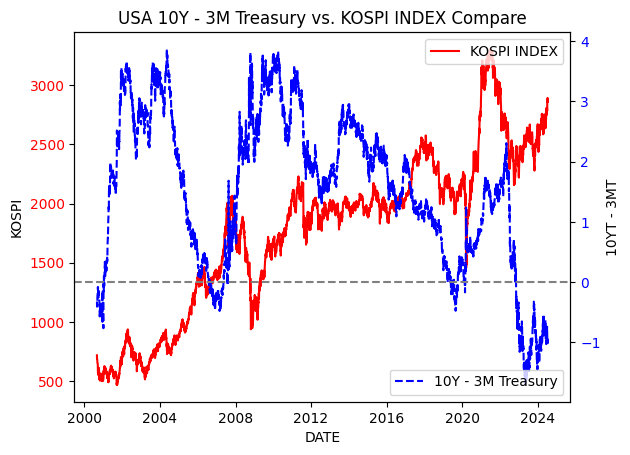

In [26]:
plt.figure(figsize = (100, 10))

fig, x1 = plt.subplots()

x1.set_xlabel("DATE")
x1.set_ylabel("KOSPI")
x1.plot(df.index, df["KOSPI"], color = "red", label = "KOSPI INDEX")
x1.legend(loc = "upper right")
x1.tick_params(axis = 'y', labelcolor = "red") # 가독성 향상

x2 = x1.twinx()
x2.set_ylabel("10YT - 3MT")
x2.plot(df.index, df["10YT - 3MT"], color = "blue", linestyle = "--", label = "10Y - 3M Treasury") # Treasury(국고 = 국채금리)
x2.legend(loc = "lower right")
x2.tick_params(axis = 'y', labelcolor = "blue") # 가독성 향상

x2.axhline(y = 0, color = "gray", linestyle = "--") # 장단기

plt.title("USA 10Y - 3M Treasury vs. KOSPI INDEX Compare")
plt.show()

# 해석
-> 2007년 금리 역전되고 약 1년 후(금융위기) KOSPI 폭락. 2020년(코로나)에도 같은 패턴으로 장단기 금리차 역전 후 KOSPI 폭락.

<br>

## 일반화
-> 장단기 금리차가 마이너스로 전환 시, 얼마 후 코스피는 폭락하는 패턴을 보이고, 다시 금리차는 플러스로 치솟는 패턴을 보임.

## 활용 가능성
-> 금리차가 플러스로 반등하고 치솟을 때 분할매수를 하면 유의미한 성과도출이 가능할 것으로 짐작됨, 하지만 표본이 25년 데이터이기 떄문에 매우 부족하므로 + 해당 패턴이 정확히 나타난 횟수는 두 번밖에 되지 않으므로 예측이 어려우며 다음에도 비슷한 흐름으로 전개될 것이라는 보장은 없음.

# 추가 : 장단기 국채금리 차이와 금값 비교(KOSPI 그래프와 유사)

<Figure size 10000x1000 with 0 Axes>

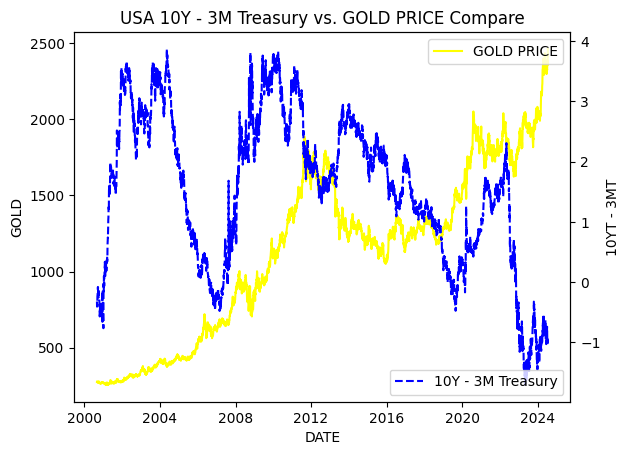

In [27]:
plt.figure(figsize = (100, 10))

fig, x1 = plt.subplots()
x1.set_xlabel("DATE")
x1.set_ylabel("GOLD")
x1.plot(df.index, df["GOLD"], color = "yellow", label = "GOLD PRICE")
x1.legend(loc = "upper right")

x2 = x1.twinx()
x2.set_ylabel("10YT - 3MT")
x2.plot(df.index, df["10YT - 3MT"], color = "blue", linestyle = "--", label = "10Y - 3M Treasury")
x2.legend(loc = "lower right")

plt.title("USA 10Y - 3M Treasury vs. GOLD PRICE Compare")
plt.show()

# 추가 2 : KOSPI 지수와 금값 추이 비교

<Figure size 10000x1000 with 0 Axes>

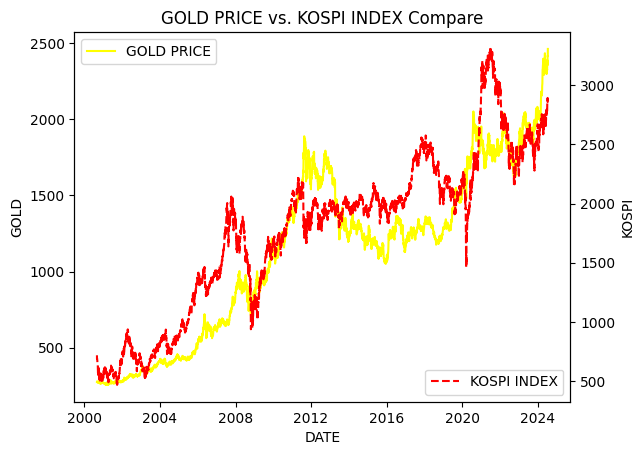

In [28]:
plt.figure(figsize = (100, 10))

fig, x1 = plt.subplots()
x1.set_xlabel("DATE")
x1.set_ylabel("GOLD")
x1.plot(df.index, df["GOLD"], color = "yellow", label = "GOLD PRICE")
x1.legend(loc = "upper left")

x2 = x1.twinx()
x2.set_ylabel("KOSPI")
x2.plot(df.index, df["KOSPI"], color = "red", linestyle = "--", label = "KOSPI INDEX")
x2.legend(loc = "lower right")

plt.title("GOLD PRICE vs. KOSPI INDEX Compare")
plt.show()

# 추가 2-1 : KOSPI 지수와 금값의 상관관계 분석

## 기반지식 : 포트폴리오 이론 요약정리
-> 리스크와 수익은 비례하지만 여러 가지 자산을 섞어 투자한다면 동일한 수익률을 유지하면서도 리스크를 특정 하한선까지 줄이는 것이 가능하다는 이론. 투자에 대한 수익과 위험은 평균과 분산으로 나타낼 수 있으며, 상관관계가 낮은 자산을 대상으로 분산투자 시 리스크를 감소시킬 수 있다는 이론이다.

- 위험을 수익률의 변동성으로 정의한다.
- 자산의 수익률이 평균으로부터 많이 움직일수록 == 편차가 클수록 수익률의 범위가 크게 되므로 리스크가 크다고 할 수 있다. 따라서 표준편차가 위험의 지표가 됨.

<br>

### 두 자산 A, B로 이뤄진 포트폴리오의 분산

$$
\sigma_p^2 = w_A^2 \sigma_A^2 + w_B^2 \sigma_B^2 + 2w_A w_B \sigma_A \sigma_B \rho_{AB}
$$

<br>


$$\sigma_p^2$$

- 전체 포트폴리오의 분산을 의미한다.

<br>

$$\rho_{AB}$$

- 상관계수를 의미한다. 공분산을 개별 주식의 표준편차로 나눈 것이며, 1에 가까우면 두 주식은 굉장한 상관성을 가지고 "같은 방향"으로 움직인다는 것을 알 수 있고, 0의 경우 상당한 분산효과를 가지며, -1의 경우 가장 큰 분산효과를 가진다. 현실에서는 -1이 불가능하며 ***0.2 정도만 나와도 분산효과가 크다***고 할 수 있다.

<br>

### 요약

=> 개별 자산의 진정한 위험은 개별자산의 표준편차가 아니라, 편입되면서 **포트폴리오 전체 수익률**의 변동성에 미치는 증분효과.

- 개별 주식의 추가로 인한 위험의 감소효과인 "분산효과"는 자산의 추가에 따라 점차 감소하나 일정 수(40 ~ 50 종목)에서는 더 이상 감소하지 않음.

- 시장 == 체계적 == 분산불가능 위험 : 리스크 감쇄시키려 해도 더 이상 감소하지 않는 위험. 시장 전체가 거시경제 변수(환율, 금리, 통화량 등)에 따라 변동되는 것을 말한다. 시장위험 측정치로는 KOSPI 수익률의 표준편차를 사용한다.(KOSPI 지수 매수 포트폴리오가 시장 전체의 성과를 대표하고, 이를 벤치마크 포트폴리오로 삼아 시장위험을 평가)

- 자산의 총 위험 = 개별자산의 '특수위험' + 시장 전체가 영향을 받음에 따라 발생하는 '시장위험' <br><br> 특수위험은 포트폴리오 구성에 따라 점점 감소시킬 수 있으므로, 이 위험에 대해서는 보상하지 않음. 즉 투자자에게 시장위험에 대해서만 보상하게 된다. 그리고 이 ***시장위험에 따라 개별자산이 얼마나 변동했는지를 나타내는 개념이 베타(beta)***가 된다.

> 해당 문단에서 설명하고 있는 베타는 CAPM (자본자산가격결정모형, Capital Asset Pricing Model)의 베타를 의미. CAPM 모델의 베타는 개별 자산의 수익률이 시장 전체의 수익률에 대해 얼마나 민감하게 반응하는지를 측정하는 지표. 즉, 베타는 시장위험에 대한 개별 자산의 민감도를 나타내며, 이는 투자자들이 시장위험에 대해 보상을 요구하는 이유와 일치함.



## 분석 진행
> References : https://dotsnlines.tistory.com/591



In [29]:
from scipy import stats # 주식(ETF) 간 상관관계 확인

In [30]:
# df = df[["KOSPI", "GOLD", "10YT - 3MT"]]

regr = stats.linregress(df.GOLD, df.KOSPI)
regr_line = f"Y = {regr.slope : .2f} * X + {regr.intercept : .2f}"

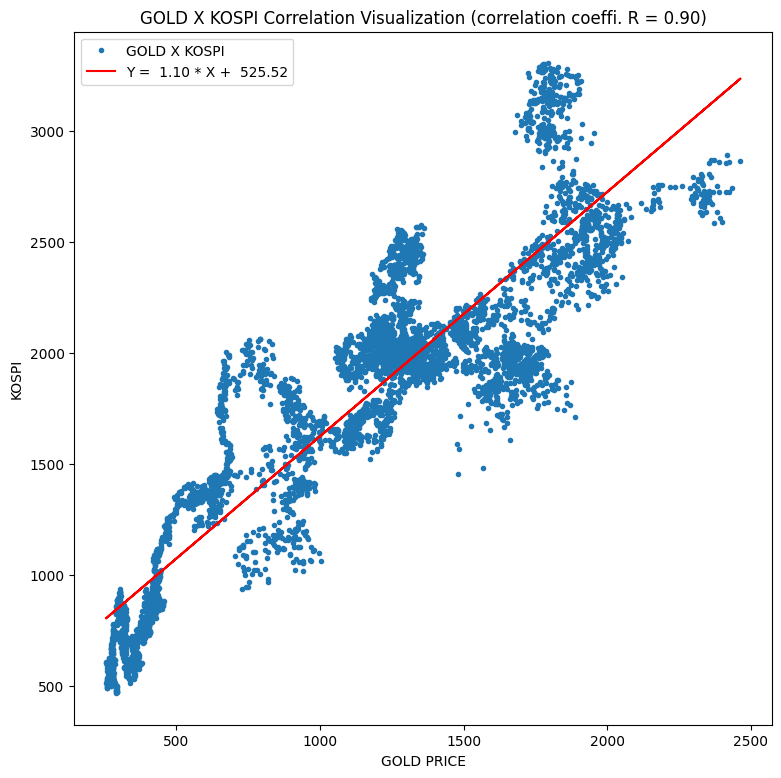

In [31]:
plt.figure(figsize = (9, 9))
plt.plot(df.GOLD, df.KOSPI, '.')
plt.plot(df.GOLD, regr.slope * df.GOLD + regr.intercept, 'r')

plt.legend(["GOLD X KOSPI", regr_line])

plt.title(f"GOLD X KOSPI Correlation Visualization (correlation coeffi. R = {regr.rvalue:.2f})")
plt.xlabel("GOLD PRICE")
plt.ylabel("KOSPI")

plt.show()

## 해석
---

- **상관계수 R = 0.90:**
  - 해석: 금값과 코스피의 상관성은 양의 상관관계를 강하게 띄며, 상관성이 강하므로 같은 포트폴리오에 담았을 때 리스크를 감소시키는 효과를 누리지 못할 수 있다. 함께 움직이는 경향이 있어, 분산 효과가 적을 수 있음.